<a href="https://colab.research.google.com/github/fcarcamo03/PROG/blob/main/clase6_1_estadisticos_descriptivos_y_correlaci_n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)

# Parte 4: Análisis descriptivo con R

**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com


Una de las fases principales dentro de un proyecto de Data Science, corresponde al análisis exploratorio de datos. Es en esta etapa donde se realizan los primeros hallazgos, se verifica la calidad de los datos, se detectan anomalías, se identifican patrones y se realizan preguntas claves que permitan comenzar a realizar inferencias , o si es el caso, comenzar a plantear modelos con fines predictivos.

## I. Estadísticos descriptivos
### a) Medidas de posición
Corresponden a valores que nos permiten dividir nuestra muestra en conjuntos con aproximadamente la misma cantidad de individuos.
### b) Medidas de tendencia central
Corresponden a medidas a las que tienden “agruparse” los datos de la muestra .
### c) Medidas de dispersión
Medidas que cuantifican el nivel de heterogeneidad de una variable numérica.


En R contamos con funciones para lo anterior:

 - summary(): Por defecto entrega estadísticos de posición (cuartiles), min, max y media.
 - quantiles(): Retorna uno o varios percentiles de interés.
 - mean(): Calcula la media de un vector numérico.
 - median(): Calcula la mediana de un vector numérico.
 - sd(): Retorna la desviación estándar muestral.
 - var(): Retorna la varianza muestral.

### I.1. Descripción de data _mpg_

Analicemos el rendimiento en ciudad en función de los estadísticos descriptivos más conocidos.


In [ ]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
data(mpg)
head(mpg)
# cyl: cilindros
# displ: Engine displacement, in lt "cilindrada"
# drv: traccion
# cty: city miles miles per gallonb
# hwy: highway miles per gallon
# fl: fuel type
# class: "type" of car

### Media, Mediana  y percentiles
Los percentiles, en particular la mediana corresponden a estadísticos de posición, ya que nos permiten "ubicarnos" dentro de la muestra que estamos analizando y nos dan una primera idea sobre la distribución de los datos a analizar. Por su parte la media (aritmética) corresponde a un estadístico de tendencia central.

In [ ]:
# describamos el rendimiento en carretera en función de los estadísticos de pos., tendencia central  y dispersión

# promedio
print(paste("El promedio es: ", mean(mpg$hwy), " millas por galón"))
# mediana
print(paste("La mediana es: ", median(mpg$hwy), " millas por galón"))




[1] "El promedio es:  23.4401709401709  millas por galón"
[1] "La mediana es:  24  millas por galón"


In [ ]:
# percentiles
quantile(mpg$hwy, 0.5)
quantile(mpg$hwy, 0.25)
# Ambos a la vez

quantile(mpg$hwy, c(0.25,0.5,0.75) )


50% 
 24

25% 
 18

25% 50% 75% 
 18  24  27

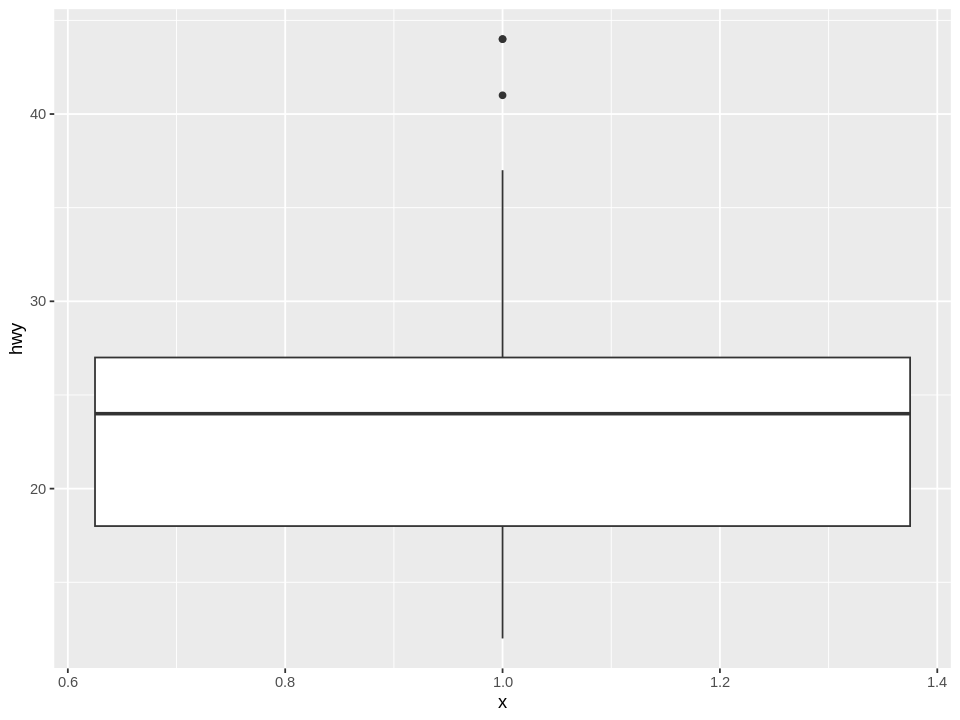

In [ ]:
# recordar que podemos visualizar los cuartiles en un boxplot
mpg %>%
  ggplot() +
  aes(y=hwy, x = 1) +
  geom_boxplot()


### Medidas de dispersión
Rango, desviación estándar  y rango intercuartílico. Son medidas que buscan cuantificar el nivel de dispersión o heterogeneidad de nuestra muestra.

In [ ]:
# Rango
max(mpg$hwy) - min(mpg$hwy)

[1] 32

In [ ]:
# Rango Inter-cuartílico
quantile(mpg$hwy, .75) - quantile(mpg$hwy, .25)

IQR(mpg$hwy)



75% 
  9

[1] 9

In [ ]:
# Una obs se considera un posible "outlier" si valor está por sobre (debajo) 1.5 veces el rango intercuartílico (RI = Q3- Q1) del Q3 (Q1)


In [ ]:
# lim sup 1.5*IQR (por "arriba")
mpg %>%
  filter(hwy >= quantile(hwy,0.75) + 1.5*IQR(hwy))
#volkswagen	jetta, volkswagen	new beetle Estos dos autos, según el criterio del rango intercuartílico son dos modelos con rendimiento atícament alto.

# lim inf 1.5*IQR (por "debajo")

mpg %>%
  filter(hwy <= quantile(hwy,0.25) - 1.5*IQR(hwy))


manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>


In [ ]:
# medidas de dispersión ---------------

# Desviación estándar
sd(mpg$hwy) # En promedio, los rendimientos de los autos distan de 6mpg de la media (del rendimiento medio)



[1] 5.954643

In [ ]:
#Salarios
#sd1: 500.000 , mu1 : 800.000
#sd2: 500.000 , mu2 : 2.500.000

In [ ]:
# Coef de variación = desviación estandar / |promedio|
 500/800
 500/2500

#Con esto, la primera muestra tiene un mayor grado de dispersión (representa un 63% de la media, en contraste con un 20%)

[1] 0.625

[1] 0.2

## II. Correlación de variables

Las medidas de correlación buscan cuantificar el nivel de asociación que existe entre dos variables. Uno de los coeficientes más populares para medir la dependencia lineal entre dos variables corresponde al coeficiente de corelación de Pearson.

Matemáticamente, el coeficiente de correlación de Pearson entre dos variables aleatorias X e Y se define como

$$\rho = \dfrac{\mathbb{E}[(X-\mu_X)(Y-\mu_Y)]}{\sqrt{\sigma^2_X\sigma^2_Y}}$$

Este coeficiente varía entre -1 y 1, y alcanza dichos valores siempre que X e Y formen una recta.

Exploremos algunos ejemplos






**¿Cómo es la relación entre el rendimiento en carretera y el tamaño del motor?**

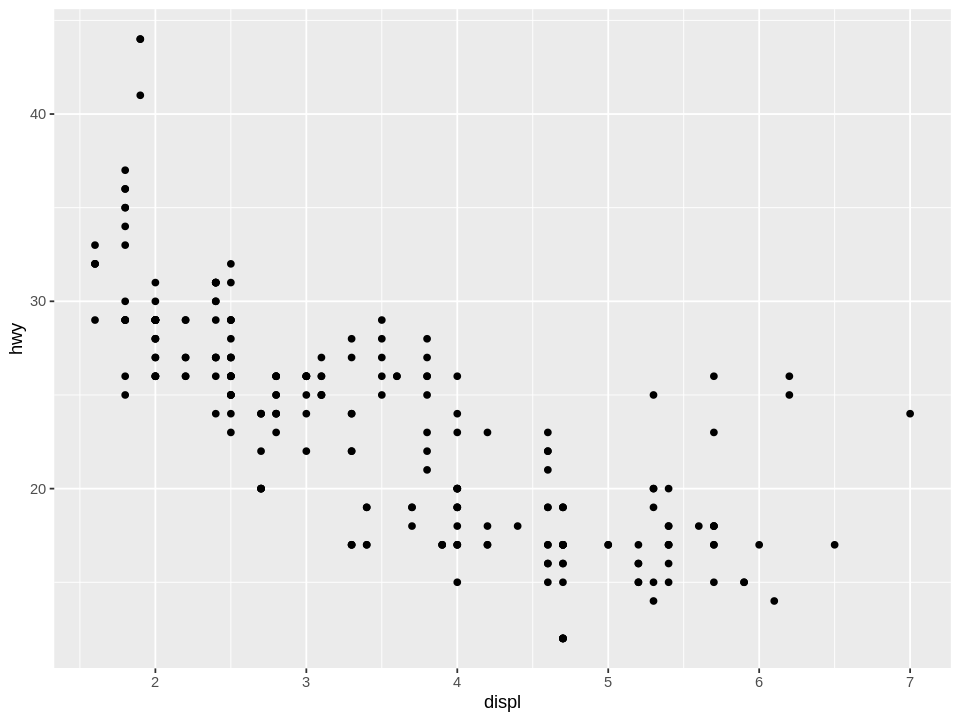

In [ ]:
# Gráficamente x = displ, y = hwy
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point()

`geom_smooth()` using formula = 'y ~ x'


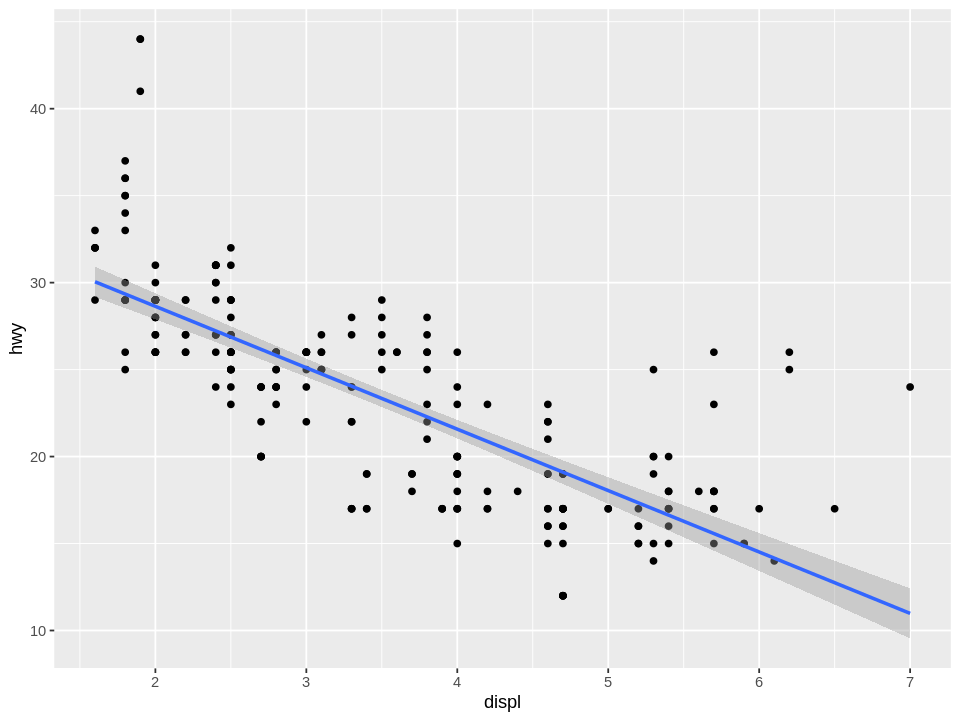

In [ ]:
# podemos añadir "recta" de tendencia
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point() +
  geom_smooth(method = "lm")

In [ ]:
cor(mpg$displ , mpg$hwy)# Por defecto entrega pearson.

[1] -0.76602

Podemos seleccionar las columnas *mpg,disp,hp,drat,wt,qsec* y generar un gráfico de dispersión para cada par de ellas, con la función plot() del paquete _base_.

In [ ]:
data(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [ ]:
#Podemos graficar algunas de las variables de interés


aux <- mtcars %>%
    select(mpg,disp,hp,drat,wt,qsec)

In [ ]:
head(aux)

,mpg,disp,hp,drat,wt,qsec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,160,110,3.90,2.620,16.46
Mazda RX4 Wag,21.0,160,110,3.90,2.875,17.02
Datsun 710,22.8,108,93,3.85,2.320,18.61
Hornet 4 Drive,21.4,258,110,3.08,3.215,19.44
Hornet Sportabout,18.7,360,175,3.15,3.440,17.02
Valiant,18.1,225,105,2.76,3.460,20.22


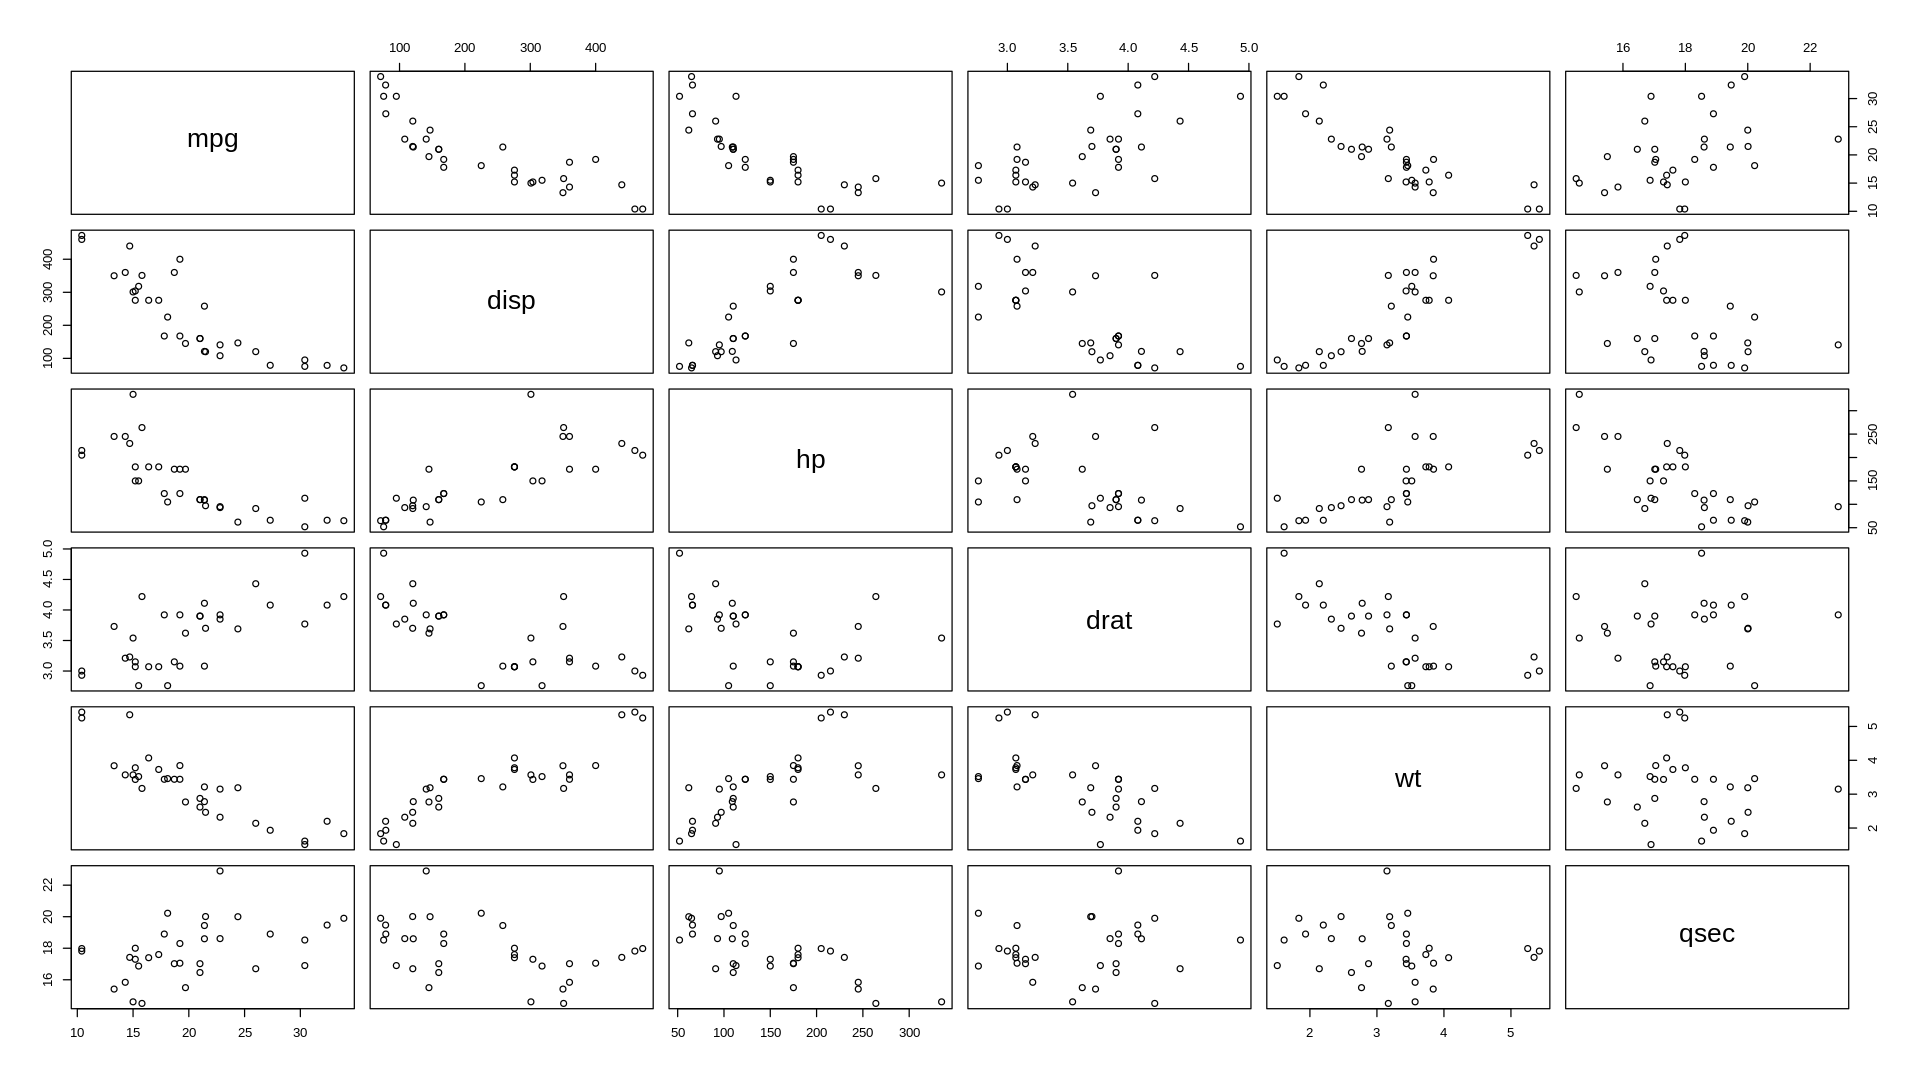

In [ ]:
options(repr.plot.width=16, repr.plot.height=9)
plot(aux)

### P1. Comando cor
Investigue el comando cor y utilícelo con la selección previa de columnas.
¿Qué observa?

### P2. De acuerdo a  la documentación, cambie el método de cálculo a "spearman"
¿Que observa?

In [ ]:
cor(aux) # por defecto calcula correlación de pearson


,mpg,disp,hp,drat,wt,qsec
mpg,1.0000000,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403
disp,-0.8475514,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788
hp,-0.7761684,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339
drat,0.6811719,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476
wt,-0.8676594,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588
qsec,0.4186840,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000


## NOTA: parámetro method de la función cor()

In [ ]:
set.seed(123) # Semilla para generar númeos aleatorios
x <- rnorm(100) # variable X
e <- rnorm(100, sd = .5) # error aleatorio
# Modelar y como funcion de x y un error aleatorio
# y = f(x) + e
y <- 1+ 3*x^3 + e

A <- data.frame(x = x, y = y)


$y = f(x) + \epsilon$ \\
$y = 3x^{3} + 1 + \epsilon$

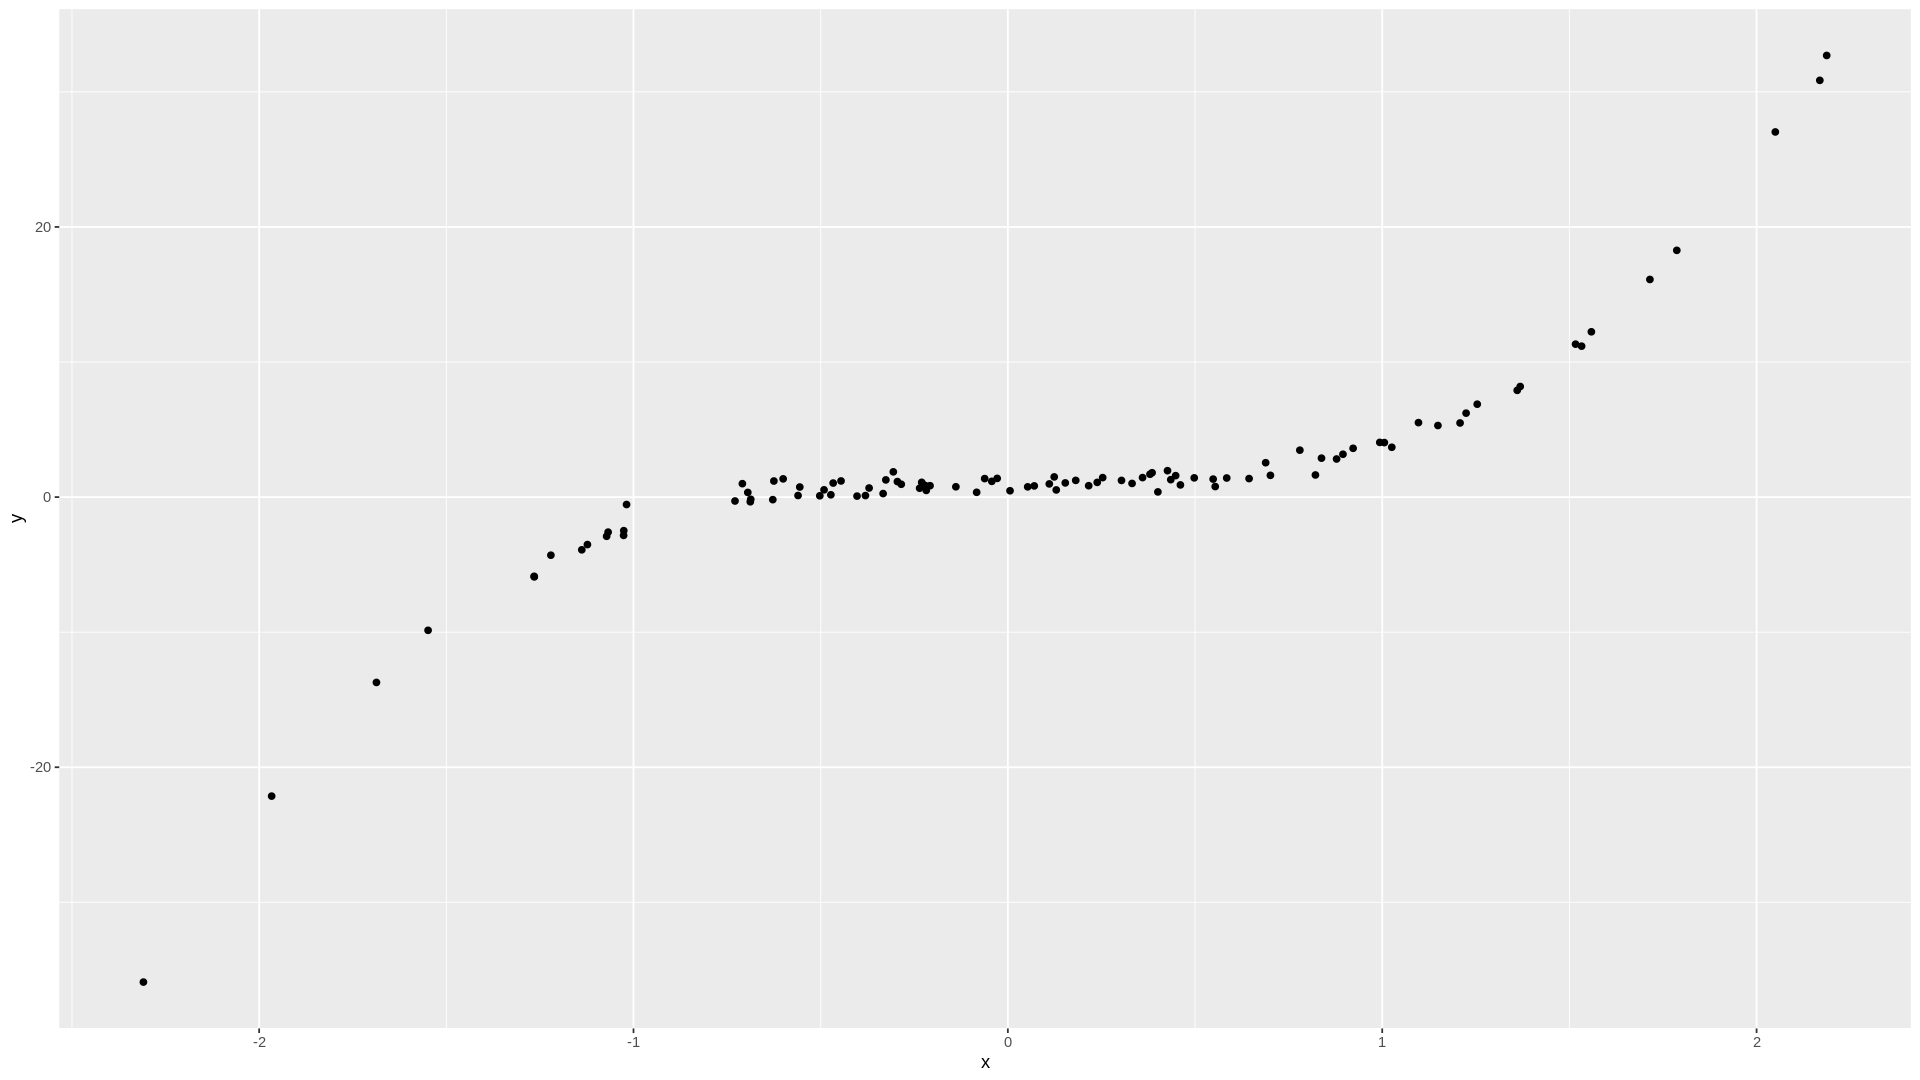

In [ ]:
# Gráficamente la relación de x e  y

A %>%
    ggplot() +
    aes(x = x, y = y) +
    geom_point()

In [ ]:
# parámetro method de la función cor()
cor(A$x,A$y)
cor(A$x,A$y, method = "spearman")

[1] 0.9845424

[1] 0.9805341

## Gráfico de correlación

In [ ]:
#install.packages("corrplot")
library(corrplot)

# función corrplot()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



### P3. Opciones de corrplot
Identifique (en la documentación de la función corplot) otros métodos de visualización

In [ ]:
matriz_cor <- cor(aux)
matriz_cor

,mpg,disp,hp,drat,wt,qsec
mpg,1.0000000,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403
disp,-0.8475514,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788
hp,-0.7761684,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339
drat,0.6811719,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476
wt,-0.8676594,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588
qsec,0.4186840,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000


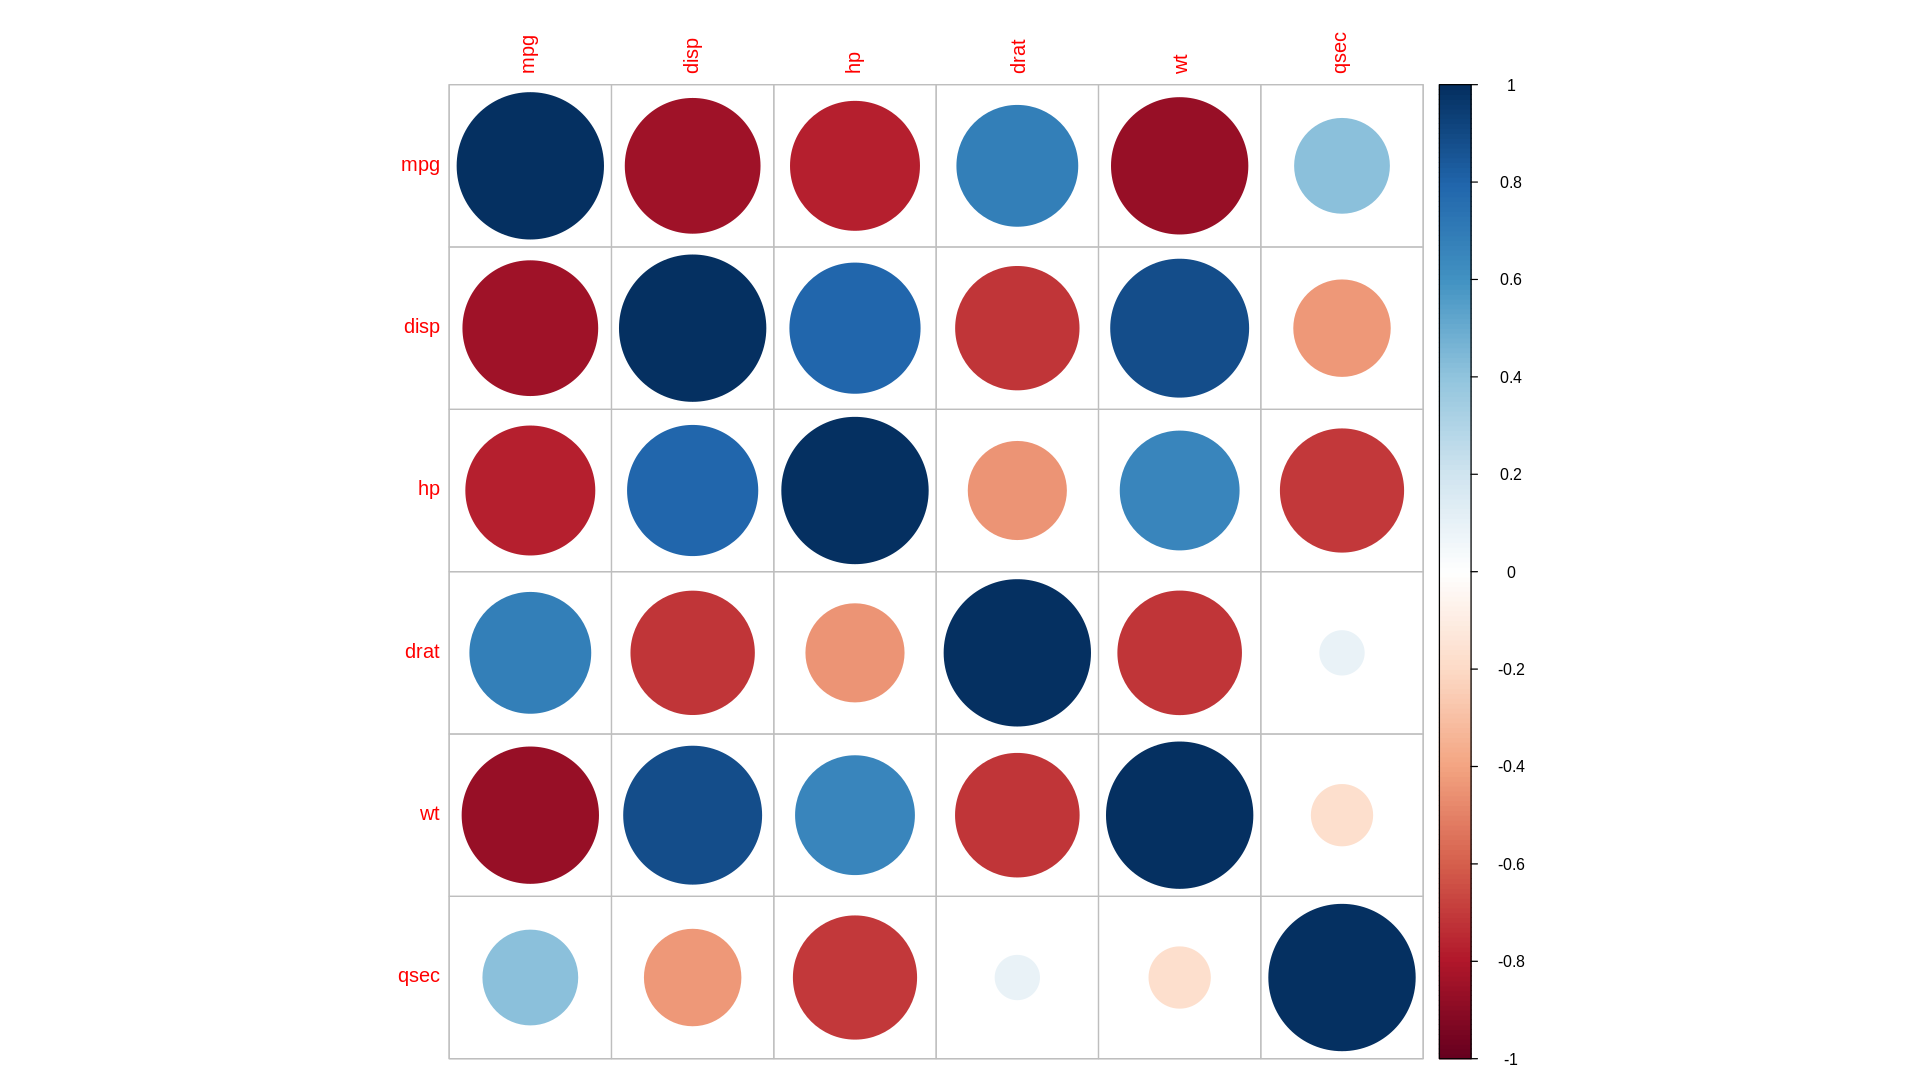

In [ ]:
# Función corplot()
# podemos modificar el parámetro "method"
corrplot(matriz_cor)